# Boiler

In [1]:
import pandas as pd 
import pandasql as ps
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms

plt.style.use('seaborn-white')


from IPython.display import display
from IPython.display import Markdown as md
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def f():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    
def nf():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', 4)

import warnings
warnings.filterwarnings('ignore')

def dp(df, r = 5, c = None):
    from IPython.display import display
    with pd.option_context('display.max_rows', 4, 'display.max_columns', None):
        display(df)

def fg(w = 6, h = 4, dpi = 120):
    plt.rcParams['figure.figsize'] = (w,h)
    plt.rcParams['figure.dpi'] = dpi
fg()

%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [50]:
#read the dataset
#note that the csv file is space delimited
df = pd.read_csv('data/abalone_csv.csv',  delimiter=',') 
df.head()
df.columns = df.columns.str.lower()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Work with binary

In [51]:
df = df[df.sex != 'I']
df.sex.value_counts()
df.sex.value_counts(1)
df['sex'] = np.where(df['sex']=='M', 1,0)
df.sex.value_counts()
df.sex.value_counts(1)

M    1528
F    1307
Name: sex, dtype: int64

M    0.538977
F    0.461023
Name: sex, dtype: float64

1    1528
0    1307
Name: sex, dtype: int64

1    0.538977
0    0.461023
Name: sex, dtype: float64

## split data

In [52]:
#CLASS needs to be dropped
X = df.drop(['sex'], axis=1) 
y = df['sex']

print(list(X.columns.values)) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'class_number_of_rings']
(2268, 8)
(567, 8)
(2268,)
(567,)


### Sklearn

In [53]:
ma = LogisticRegression(random_state=0, 
                            multi_class='multinomial', 
                            penalty='none', 
                            solver='newton-cg')
ma.fit(X_train, y_train)
probs1 = ma.predict_proba(X_test)

LogisticRegression(multi_class='multinomial', penalty='none', random_state=0,
                   solver='newton-cg')

In [54]:
ma.classes_

array([0, 1])

In [55]:
pd.DataFrame(ma.coef_).T

,0
0,-0.763841
1,-2.823760
2,-1.088729
3,0.074097
4,1.316926
5,-1.088694
6,0.246428
7,0.001126


#### acurária

In [56]:
ma.score(X_test, y_test)

0.5590828924162258

In [57]:
probsexp = np.exp(ma.predict_log_proba(X_test))
probsexp

array([[0.469228  , 0.530772  ],
       [0.19329178, 0.80670822],
       [0.56066135, 0.43933865],
       ...,
       [0.52677985, 0.47322015],
       [0.49285641, 0.50714359],
       [0.47322902, 0.52677098]])

In [58]:
ma.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'none',
 'random_state': 0,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [59]:
probs1df = pd.DataFrame(probs1, columns = [1,0])

In [60]:
probs1df

,1,0
0,0.469228,0.530772
1,0.193292,0.806708
2,0.560661,0.439339
3,0.448752,0.551248
4,0.482762,0.517238
...,...,...
562,0.587365,0.412635
563,0.414407,0.585593
564,0.526780,0.473220
565,0.492856,0.507144


In [74]:
preds = probs1df.idxmax(axis=1)

#Create a confusion matrix
#y_test as first argument and the preds as second argument 
cm = confusion_matrix(y_test, preds)
cm

#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(cm)
#Create DataFrame from confmtrx array 
#rows for test: Male, Female, Infant designation as index 
#columns for preds: male, predicted_female, predicted_infant as column

pd.DataFrame(confmtrx, index=['Male', 'Female'],
columns=['predicted_Male', 'predicted_Female'])

#Accuracy statistics
print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

array([[148, 103],
       [214, 102]])

,predicted_Male,predicted_Female
Male,148,103
Female,214,102


Accuracy Score: 0.4409171075837742


### statsmodels

In [61]:
logit_model=sm.MNLogit(endog = y_train,
                       exog = sm.add_constant(X_train))
logit_model
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.677898
         Iterations 5


#### Utilização de grupo de referência

In [62]:
stats1=result.summary()
print(stats1)

                          MNLogit Regression Results                          
Dep. Variable:                    sex   No. Observations:                 2268
Model:                        MNLogit   Df Residuals:                     2259
Method:                           MLE   Df Model:                            8
Date:                Tue, 18 Jan 2022   Pseudo R-squ.:                 0.01865
Time:                        19:33:23   Log-Likelihood:                -1537.5
converged:                       True   LL-Null:                       -1566.7
Covariance Type:            nonrobust   LLR p-value:                 9.447e-10
                sex=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.8821      0.517      5.573      0.000       1.869       3.896
length                   -1.5277      2.281     -0.670      0.503      -5.999       2.943
diameter

In [63]:
stats2=result.summary2()
print(stats2)

                           Results: MNLogit
Model:                 MNLogit           Pseudo R-squared:  0.019     
Dependent Variable:    sex               AIC:               3092.9431 
Date:                  2022-01-18 19:33  BIC:               3144.4830 
No. Observations:      2268              Log-Likelihood:    -1537.5   
Df Model:              8                 LL-Null:           -1566.7   
Df Residuals:          2259              LLR p-value:       9.4473e-10
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        5.0000                                         
----------------------------------------------------------------------
       sex = 0         Coef.  Std.Err.    t    P>|t|   [0.025   0.975]
----------------------------------------------------------------------
                const  2.8821   0.5171  5.5734 0.0000   1.8685  3.8956
               length -1.5277   2.2812 -0.6697 0.5031  -5.9987  2.9434
             diameter -5.6475   2

In [64]:
params = result.params
params

,0
const,2.882053
length,-1.527680
diameter,-5.647519
height,-2.177423
whole_weight,0.148207
shucked_weight,2.633840
viscera_weight,-2.177409
shell_weight,0.492837
class_number_of_rings,0.002251


In [65]:
X_train.shape
X_test.shape

(2268, 8)

(567, 8)

In [66]:
probs = logit_model.predict(params = params, exog = sm.add_constant(X_test))
probsdf = pd.DataFrame(probs, columns = [1,0])
probsdf

,1,0
0,0.469228,0.530772
1,0.193292,0.806708
2,0.560661,0.439339
3,0.448752,0.551248
4,0.482762,0.517238
...,...,...
562,0.587366,0.412634
563,0.414408,0.585592
564,0.526780,0.473220
565,0.492856,0.507144


In [67]:
preds = probsdf.idxmax(axis=1)

In [72]:
#Create a confusion matrix
#y_test as first argument and the preds as second argument 
cm = confusion_matrix(y_test, preds)
cm

#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(cm)
#Create DataFrame from confmtrx array 
#rows for test: Male, Female, Infant designation as index 
#columns for preds: male, predicted_female, predicted_infant as column

pd.DataFrame(confmtrx, index=['Male', 'Female'],
columns=['predicted_Male', 'predicted_Female'])

array([[148, 103],
       [214, 102]])

,predicted_Male,predicted_Female
Male,148,103
Female,214,102


In [70]:
#Accuracy statistics
print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

Accuracy Score: 0.4409171075837742


In [71]:
#Create classification report
class_report=classification_report(y_test, preds)
print(class_report)

              precision    recall  f1-score   support

           0       0.41      0.59      0.48       251
           1       0.50      0.32      0.39       316

    accuracy                           0.44       567
   macro avg       0.45      0.46      0.44       567
weighted avg       0.46      0.44      0.43       567



# Metrics plot

In [75]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from scipy import interp

In [76]:
n_classes = y.nunique()

In [77]:
y_test_one = np.array(pd.get_dummies(y_test))

In [78]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
thres = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thres[i] = roc_curve(y_test_one[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

## Calcular a curva roc_auc micro, ponderada então pela quantidade existente em cada classe

In [80]:
y_test_one

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [81]:
probs

array([[0.4692278 , 0.5307722 ],
       [0.19329196, 0.80670804],
       [0.56066125, 0.43933875],
       ...,
       [0.52677983, 0.47322017],
       [0.49285634, 0.50714366],
       [0.47322885, 0.52677115]])

In [90]:
y_test_one.ravel(); 
probs.ravel()

array([0, 1, 0, ..., 1, 1, 0], dtype=uint8)

array([0.4692278 , 0.5307722 , 0.19329196, ..., 0.50714366, 0.47322885,
       0.52677115])

In [91]:
# Compute micro-average ROC curve and ROC area
# Perceba que o número de amostras existentes em cada classe fará diferença, afinal serão 
# diferentes matrizes de confusão produzidas com diferentes thresholds
fpr_micro, tpr_micro, thres_micro = roc_curve(y_test_one.ravel(), probs.ravel())
roc_auc_micro= auc(fpr_micro, tpr_micro)

## Calcular a curva roc_auc média 'macro'

#### Interpolação

In [94]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [95]:
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
# Obter TRP pela interpolação entre as curvas
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [96]:
fpr_macro = all_fpr
# Ponderar pelas 3 classes
# Desta forma é ponderação simples, e não considerando o quanto tem de cada classe
tpr_macro = mean_tpr/ n_classes

In [97]:
roc_auc_macro = auc(fpr_macro, tpr_macro)

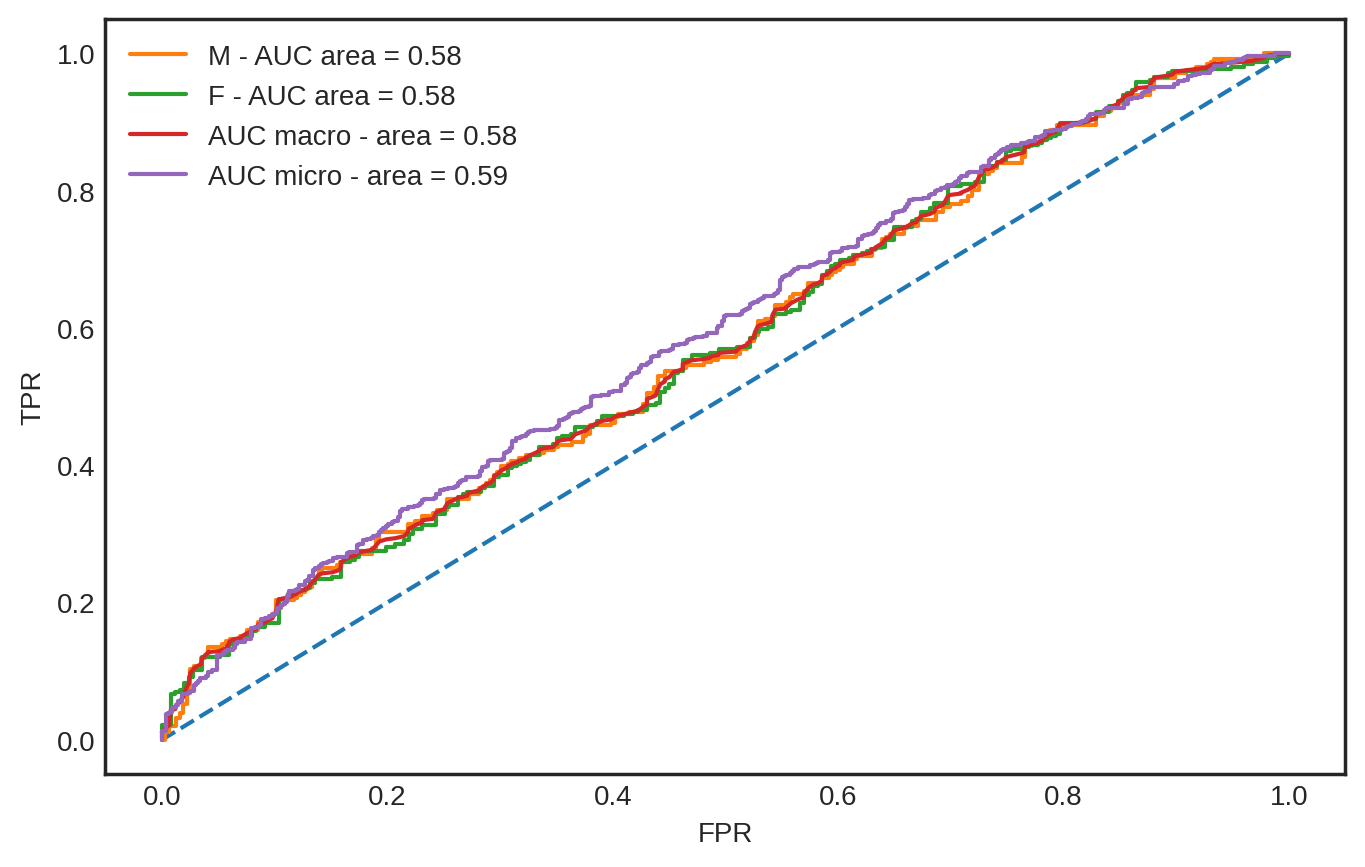

In [98]:
fg(w = 8, h = 5, dpi = 200)
plt.plot([0,1],[0,1], '--');
plt.plot(fpr[0], tpr[0], label = 'M - AUC area = {0:0.2f}'.format(roc_auc[0]));
plt.plot(fpr[1], tpr[1], label = 'F - AUC area = {0:0.2f}'.format(roc_auc[1]));
plt.plot(fpr_macro, tpr_macro, label = 'AUC macro - area = {0:0.2f}'.format(roc_auc_macro))
plt.plot(fpr_micro, tpr_micro, label = 'AUC micro - area = {0:0.2f}'.format(roc_auc_micro))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend();
plt.show();

# Dummy Classifier

In [208]:
# example of a roc auc for a predictive model
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.metrics import balanced_accuracy_score, accuracy_score

In [332]:
# generate 2 class dataset
n_classes = 2
X, y = make_classification(n_samples=10000, n_classes=n_classes, random_state=1, weights = (0.8,0.2))
print('Distribuition:')
pd.Series(y).value_counts(1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# no skill model, stratified random class predictions
model = DummyClassifier(strategy='most_frequent')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
pos_probs = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(testy, pos_probs)
accuracy = accuracy_score(testy, pos_probs)
balancedacc = balanced_accuracy_score(testy, pos_probs)
print('No Skill ROC AUC %.3f' % roc_auc)
print('Balanced Accuracy %.3f' % balancedacc)
print('Accuracy %.3f' % accuracy)
testy_dummy = testy
pos_probs_dummy = yhat[:, 1]
# prever a maioria
pd.Series(pos_probs_dummy).value_counts()

Distribuition:


0    0.796
1    0.204
dtype: float64

DummyClassifier(strategy='most_frequent')

No Skill ROC AUC 0.500
Balanced Accuracy 0.500
Accuracy 0.797


0.0    5000
dtype: int64

In [333]:
# skilled model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
yhat = model.predict_proba(testX)
ypred = model.predict(testX)
pos_probs = yhat[:, 1]
# calculate roc auc
roc_auc = roc_auc_score(testy, ypred)
accuracy = accuracy_score(testy, ypred)
balancedacc = balanced_accuracy_score(y_true = testy, y_pred = ypred)
print('Logistic ROC AUC %.3f' % roc_auc)
print('Accuracy %.3f' % accuracy)
print('Balanced Accuracy %.3f' % balancedacc)
testy_skilled = testy
pos_probs_skilled = yhat[:, 1]

LogisticRegression()

Logistic ROC AUC 0.840
Accuracy 0.919
Balanced Accuracy 0.840


## Normal

### Dummy

In [334]:
pd.Series(pos_probs_dummy).value_counts(1)
pd.Series(testy_dummy).value_counts(1)

0.0    1.0
dtype: float64

0    0.7972
1    0.2028
dtype: float64

In [335]:
fpr_dummy, tpr_dummy, thres_dummy = roc_curve(testy_dummy, pos_probs_dummy)
roc_auc_dummy= auc(fpr_dummy, tpr_dummy)

### Skilled

In [336]:
pd.Series(pos_probs_skilled).value_counts(1)
pd.Series(testy_skilled).value_counts(1)
fpr_skilled, tpr_skilled, thres_skilled = roc_curve(testy_skilled, pos_probs_skilled)
roc_auc_skilled= auc(fpr_skilled, tpr_skilled)

0.178281    0.0002
0.063250    0.0002
0.025754    0.0002
0.016840    0.0002
0.859975    0.0002
             ...  
0.019838    0.0002
0.047516    0.0002
0.012856    0.0002
0.172301    0.0002
0.004634    0.0002
Length: 5000, dtype: float64

0    0.7972
1    0.2028
dtype: float64

## Macro and micro

### dummy

#### macro

In [337]:
# Compute ROC curve and ROC area for each class
fpr_dummy_dict = dict()
tpr_dummy_dict = dict()
thres_dummy_dict = dict()
roc_auc_dummy_dict = dict()
for i in range(n_classes):
    fpr_dummy_dict[i], tpr_dummy_dict[i], thres_dummy_dict[i] = roc_curve(testy_dummy, pos_probs_dummy)
    roc_auc_dummy_dict[i]= auc(fpr_dummy_dict[i], tpr_dummy_dict[i])

In [338]:
#### Interpolação

# First aggregate all false positive rates
all_fpr_dummy = np.unique(np.concatenate([fpr_dummy_dict[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_dummy = np.zeros_like(all_fpr_dummy)
# Obter TRP pela interpolação entre as curvas
for i in range(n_classes):
    mean_tpr_dummy += interp(all_fpr_dummy, fpr_dummy_dict[i], tpr_dummy_dict[i])

fpr_macro_dummy = all_fpr_dummy
# Ponderar pelas 2 classes
# Desta forma é ponderação simples, e não considerando o quanto tem de cada classe
tpr_macro_dummy = mean_tpr_dummy/ n_classes
roc_auc_macro_dummy = auc(fpr_macro_dummy, tpr_macro_dummy)
roc_auc_macro_dummy

0.5

#### micro

In [339]:
# Compute micro-average ROC curve and ROC area
# Perceba que o número de amostras existentes em cada classe fará diferença, afinal serão 
# diferentes matrizes de confusão produzidas com diferentes thresholds
fpr_micro_dummy, tpr_micro_dummy, thres_micro_dummy = roc_curve(testy_dummy.ravel(), pos_probs_dummy.ravel())
roc_auc_micro_dummy = auc(fpr_micro_dummy, tpr_micro_dummy)
roc_auc_micro_dummy

0.5

### skilled

#### macro

In [340]:
# Compute ROC curve and ROC area for each class
fpr_skilled_dict = dict()
tpr_skilled_dict = dict()
thres_skilled_dict = dict()
roc_auc_skilled_dict = dict()
for i in range(n_classes):
    fpr_skilled_dict[i], tpr_skilled_dict[i], thres_skilled_dict[i] = roc_curve(testy_skilled, pos_probs_skilled)
    roc_auc_skilled_dict[i]= auc(fpr_skilled_dict[i], tpr_skilled_dict[i])

In [341]:
#### Interpolação

# First aggregate all false positive rates
all_fpr_skilled = np.unique(np.concatenate([fpr_skilled_dict[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr_skilled = np.zeros_like(all_fpr_skilled)
# Obter TRP pela interpolação entre as curvas
for i in range(n_classes):
    mean_tpr_skilled += interp(all_fpr_skilled, fpr_skilled_dict[i], tpr_skilled_dict[i])

fpr_macro_skilled = all_fpr_skilled
# Ponderar pelas 2 classes
# Desta forma é ponderação simples, e não considerando o quanto tem de cada classe
tpr_macro_skilled = mean_tpr_skilled/ n_classes
roc_auc_macro_skilled = auc(fpr_macro_skilled, tpr_macro_skilled)
roc_auc_macro_skilled

0.9331286227634987

#### micro

In [342]:
# Compute micro-average ROC curve and ROC area
# Perceba que o número de amostras existentes em cada classe fará diferença, afinal serão 
# diferentes matrizes de confusão produzidas com diferentes thresholds
fpr_micro_skilled, tpr_micro_skilled, thres_micro_skilled = roc_curve(testy_skilled.ravel(), pos_probs_skilled.ravel())
roc_auc_micro_skilled = auc(fpr_micro_skilled, tpr_micro_skilled)
roc_auc_micro_skilled

0.9325400242070125

## plot

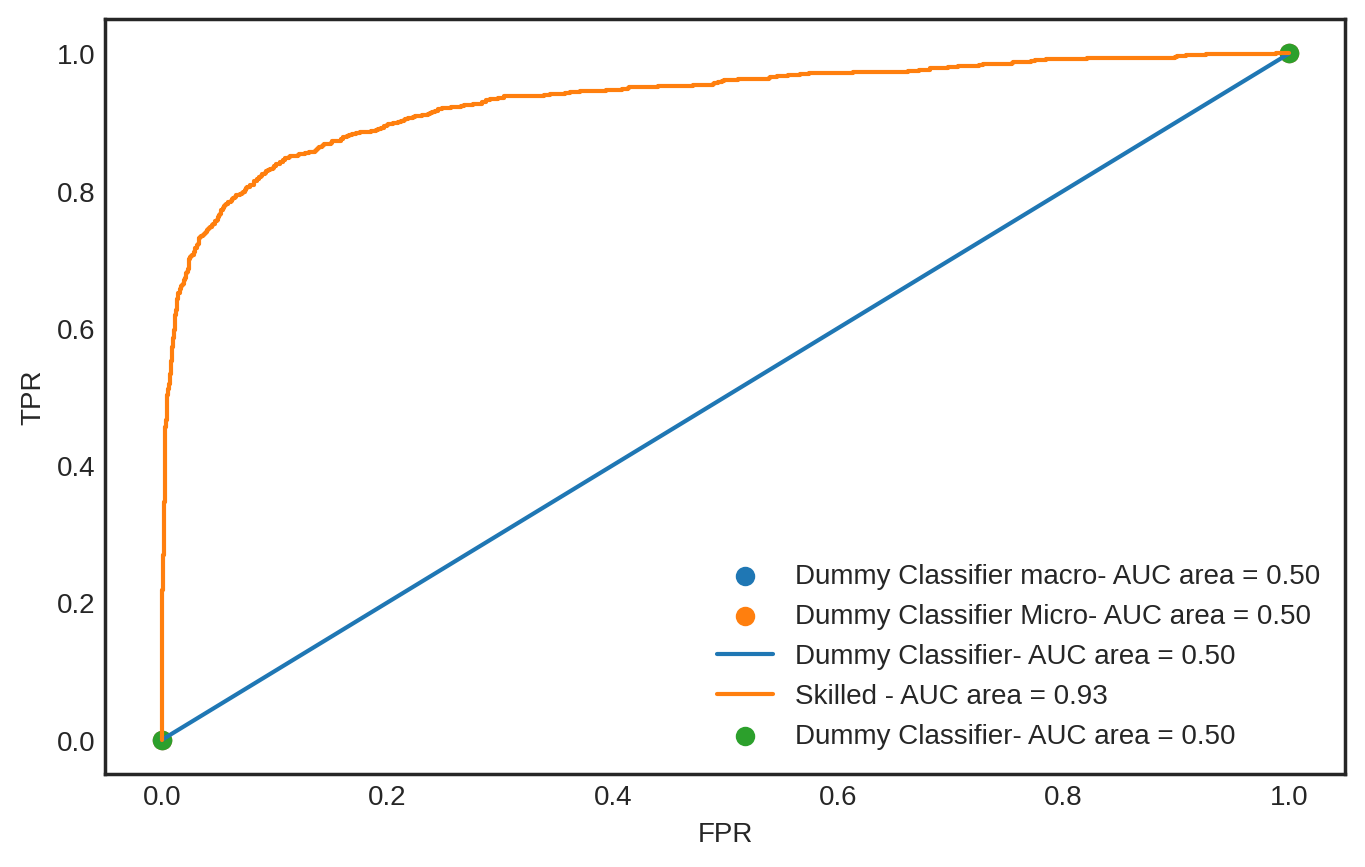

In [343]:
fg(w = 8, h = 5, dpi = 200)
# macro 
plt.scatter(fpr_macro_dummy, tpr_macro_dummy, label = 'Dummy Classifier macro- AUC area = {0:0.2f}'.format(roc_auc_macro_dummy));
# plt.plot(fpr_macro_skilled, tpr_macro_skilled, label = 'Skilled macro - AUC area = {0:0.2f}'.format(roc_auc_macro_skilled));
# micro 
plt.scatter(fpr_micro_dummy, tpr_micro_dummy,  label = 'Dummy Classifier Micro- AUC area = {0:0.2f}'.format(roc_auc_micro_dummy));
# plt.plot(fpr_micro_skilled, tpr_micro_skilled, label = 'Skilled Micro - AUC area = {0:0.2f}'.format(roc_auc_micro_skilled));
# normal curve
plt.plot(fpr_dummy, tpr_dummy, label = 'Dummy Classifier- AUC area = {0:0.2f}'.format(roc_auc_dummy));
plt.plot(fpr_skilled, tpr_skilled, label = 'Skilled - AUC area = {0:0.2f}'.format(roc_auc_skilled));
plt.scatter(fpr_dummy, tpr_dummy, label = 'Dummy Classifier- AUC area = {0:0.2f}'.format(roc_auc_dummy));

# labels
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend();
plt.show();

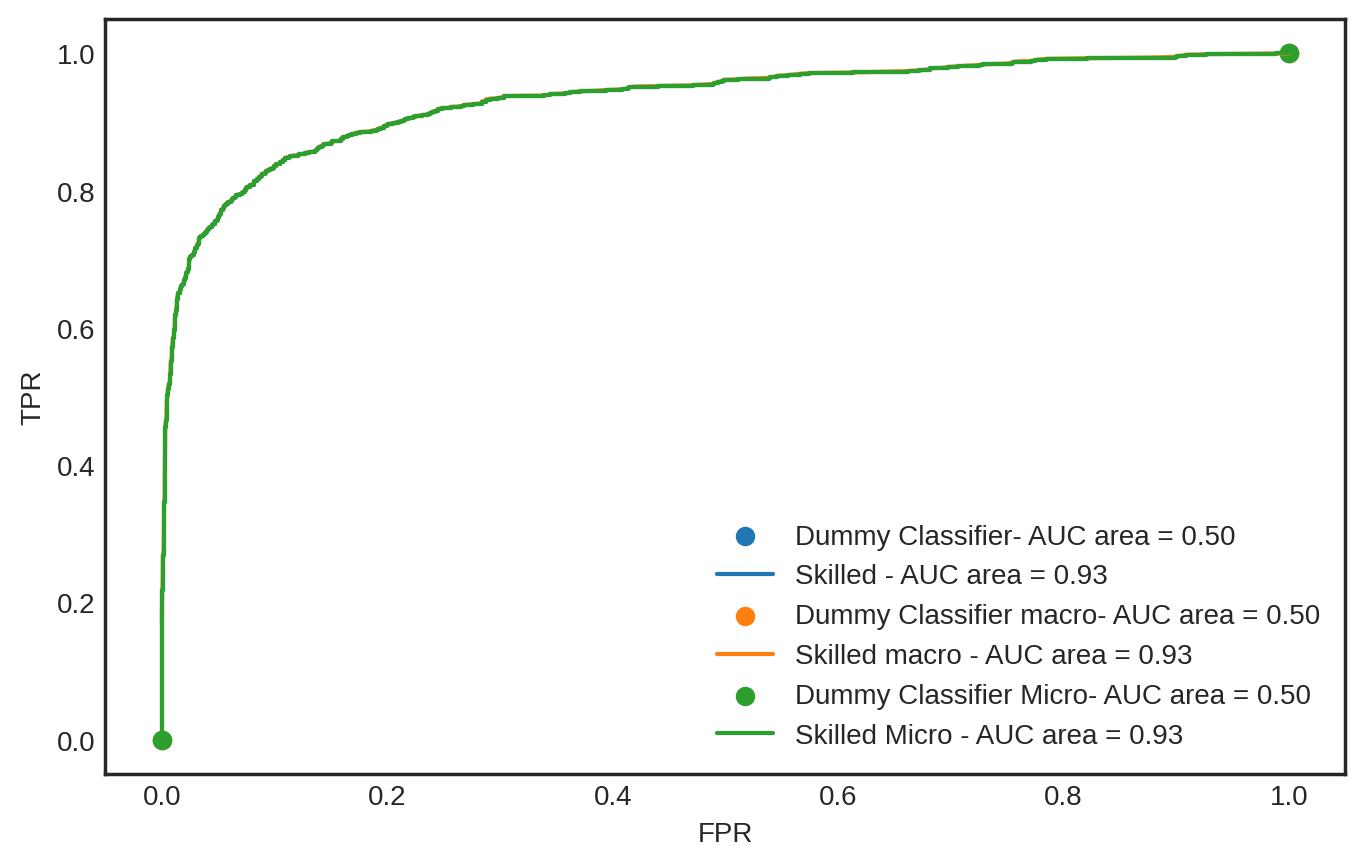

In [344]:
fg(w = 8, h = 5, dpi = 200)
# normal curve
plt.scatter(fpr_dummy, tpr_dummy, label = 'Dummy Classifier- AUC area = {0:0.2f}'.format(roc_auc_dummy));
plt.plot(fpr_skilled, tpr_skilled, label = 'Skilled - AUC area = {0:0.2f}'.format(roc_auc_skilled));
# macro 
plt.scatter(fpr_macro_dummy, tpr_macro_dummy, label = 'Dummy Classifier macro- AUC area = {0:0.2f}'.format(roc_auc_macro_dummy));
plt.plot(fpr_macro_skilled, tpr_macro_skilled, label = 'Skilled macro - AUC area = {0:0.2f}'.format(roc_auc_macro_skilled));
# micro 
plt.scatter(fpr_micro_dummy, tpr_micro_dummy,  label = 'Dummy Classifier Micro- AUC area = {0:0.2f}'.format(roc_auc_micro_dummy));
plt.plot(fpr_micro_skilled, tpr_micro_skilled, label = 'Skilled Micro - AUC area = {0:0.2f}'.format(roc_auc_micro_skilled));
# labels
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend();
plt.show();

### Threshold plots

In [345]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [346]:
# thres_skilled 
f1score = np.zeros(len(thres_skilled))
precisionscore = np.zeros(len(thres_skilled))
recallscore = np.zeros(len(thres_skilled))

for i,thres in enumerate(thres_skilled):
    f1score[i] = f1_score(testy_skilled, np.where(pos_probs_skilled>thres, 1,0))
    precisionscore[i] = precision_score(testy_skilled, np.where(pos_probs_skilled>thres, 1,0))
    recallscore[i] = recall_score(testy_skilled, np.where(pos_probs_skilled>thres, 1,0))

In [353]:
metrics = pd.DataFrame({'thres':thres_skilled,'f1':f1score,'pre':precisionscore,'rec':recallscore})

metrics = metrics[metrics.thres <1]

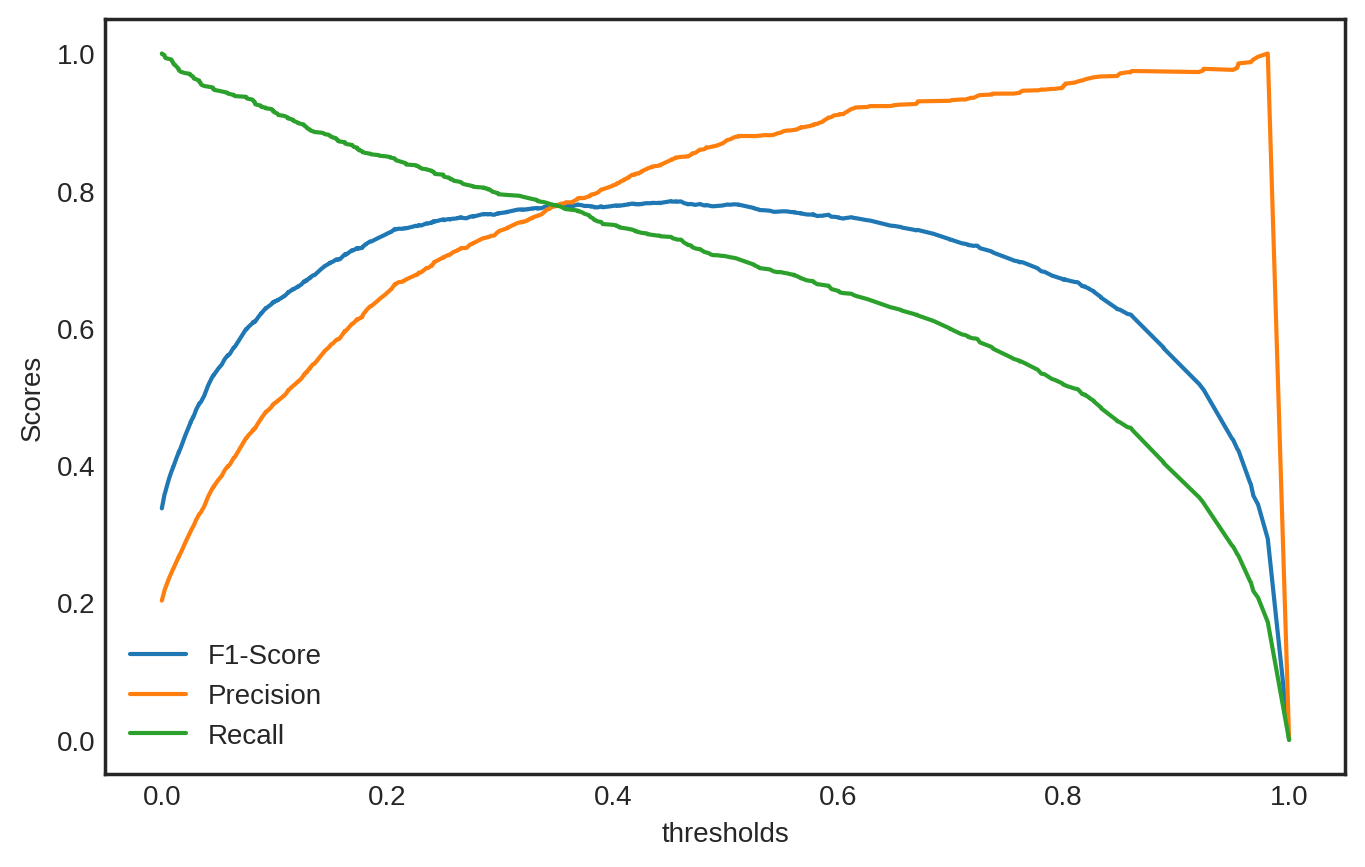

In [354]:
plt.plot(metrics['thres'],metrics['f1'], label = 'F1-Score');
plt.plot(metrics['thres'],metrics['pre'], label = 'Precision');
plt.plot(metrics['thres'],metrics['rec'], label = 'Recall');
plt.ylabel('Scores');
plt.xlabel('thresholds')
plt.legend();
plt.show();